In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

## 数据由星巴克提供，用来模拟他们的顾客和交易，看看是否有更好的方法来向顾客发送特定的促销优惠

### 原始数据
1. portfolio.csv - 发送给顾客的优惠数据（10个优惠; 6列）。
2. profile.csv - 客户的人口统计学数据（17,000名客户; 5列）。
3. transcript.csv - 客户对报价和交易的反应（306,648个事件; 4列）。

# EDA，了解数据集

本案例研究的目的是了解顾客对不同优惠的反应，以便想出更好的方法来向顾客发送特定的促销优惠。客户根据他们的交易活动被划分为不同的部分，这样就可以就个别部分提出具体的建议，以提高客户的粘性、品牌意识和增加总体的收入。客户细分也提供了关于新客户定位的洞察力。

### 载入数据

In [2]:
data_portfolio = pd.read_csv('Starbucks Customer Segmentation/portfolio.csv', index_col=0)
data_profile= pd.read_csv('Starbucks Customer Segmentation/profile.csv', index_col=0)
data_transcript = pd.read_csv('Starbucks Customer Segmentation/transcript.csv', index_col=0)

In [3]:
data_portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [4]:
data_profile

,gender,age,id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [5]:
data_transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


### 初步理解数据信息

1. 本次活动，星巴克一共推出了十种不同的优惠方案；十种方案有不同的推荐渠道、持续时间、奖励、获取难度等
3. 共有17000名客户参与，包含性别、年龄、会员ID、成为会员的日期和收入
3. 活动期间，每位参与者收到的优惠方式和数量均不相同,总共约30W条活动记录

In [6]:
# 对数据集进行 更明显的改名
data_offer = data_portfolio
data_customer = data_profile

## 提出问题
1. 这次活动是否有效？
2. 不同客户群体的活动效益？
3. 有什么改进措施？
4. 特定客户群体的特殊对待？

# 数据预处理

## 处理缺失值

In [7]:
# 检查是否有缺失值
print('data_offer: ' + '\n' + str(data_offer.isnull().sum()))
print('\ndata_customer: ' + '\n' + str(data_customer.isnull().sum()))
print('\ndata_transcript: ' + '\n' + str(data_transcript.isnull().sum()))

data_offer: 
reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

data_customer: 
gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

data_transcript: 
person    0
event     0
value     0
time      0
dtype: int64


In [8]:
# 检查data_customer缺失值的具体情况
data_customer[data_customer['gender'].isnull()]

,gender,age,id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,NaN,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,NaN,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
...,...,...,...,...,...
16980,NaN,118,5c686d09ca4d475a8f750f2ba07e0440,20160901,NaN
16982,NaN,118,d9ca82f550ac4ee58b6299cf1e5c824a,20160415,NaN
16989,NaN,118,ca45ee1883624304bac1e4c8a114f045,20180305,NaN
16991,NaN,118,a9a20fa8b5504360beb4e7c8712f8306,20160116,NaN


通过观察，发现gender和income的缺失值似乎总是一起出现

In [9]:
# 验证两者缺失值之间的关系
missing_num = (data_customer[data_customer['gender'].isnull()]['id'] == data_customer[data_customer['income'].isnull()]['id']).sum()
missing_num

2175

In [10]:
# 测算缺失比例
'Missing Number percentage: {:.2%}'.format(missing_num / len(data_customer))

'Missing Number percentage: 12.79%'

### 根据现有特征，无法较为准确的填充缺失值，为了避免误导数据集结果，直接删除缺失值

In [11]:
drop_row = data_customer[data_customer['gender'].isnull()].index
data_customer.drop(drop_row, inplace=True)

In [12]:
data_customer

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


## 缺失值处理完毕
## 进行数据列的类型转换，方便后续分析
检查各数据集的数据列类型

In [13]:
data_offer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes


In [14]:
data_customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 694.9+ KB


In [15]:
# 转换日期类型
data_customer['became_member_date'] = pd.to_datetime(data_customer['became_member_on'], format='%Y%m%d')
data_customer.drop('became_member_on', axis=1, inplace=True)

In [16]:
data_customer.head()

,gender,age,id,income,became_member_date
1,F,55,0610b486422d4921ae7d2bf64640c50b,112000.0,2017-07-15
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017-05-09
5,M,68,e2127556f4f64592b11af22de27a7932,70000.0,2018-04-26
8,M,65,389bc3fa690240e798340f5a15918d5c,53000.0,2018-02-09
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2017-11-11


In [17]:
data_transcript.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 11.7+ MB


## 进行数据转换

In [18]:
# data_transcript的value列包含了两个变量
data_transcript['value'].head()

0    {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1    {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2    {'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3    {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4    {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
Name: value, dtype: object

In [19]:
# 拆分列
value_column = data_transcript['value']

# 字符串解析为实际的Python字典
value_column = value_column.apply(eval)

# 提取每个字典的键和值,存储在列表中
dictionary_key_column = [list(d.keys())[0] for d in value_column]
dictionary_value_column = [list(d.values())[0] for d in value_column]

value_column_split = pd.DataFrame(columns = ['dict_key', 'dict_value'])

value_column_split['dict_key'] = dictionary_key_column
value_column_split['dict_value'] = dictionary_value_column

value_column_split.head()

,dict_key,dict_value
0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,offer id,2906b810c7d4411798c6938adc9daaa5
3,offer id,fafdcd668e3743c1bb461111dcafc2a4
4,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0


In [20]:
data_transcript2 = data_transcript.drop('value', axis=1)

data_transcript2 = pd.concat([data_transcript2, value_column_split], axis=1)
data_transcript2

,person,event,time,dict_key,dict_value
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,0,offer id,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,offer id,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,amount,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,amount,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,714,amount,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,amount,3.53


## 数据预处理完，备份进行EDA

In [21]:
data_offer3 = data_offer.copy()
data_customer3 = data_customer.copy()
data_transcript3 = data_transcript2.copy()

# EDA

## 对客户进行特征探索 -- 单变量统计分析
探索客户的性别、年龄、薪资等对活动的影响

### 性别分析

In [22]:
data_customer3['gender'].value_counts()

gender
M    8484
F    6129
O     212
Name: count, dtype: int64

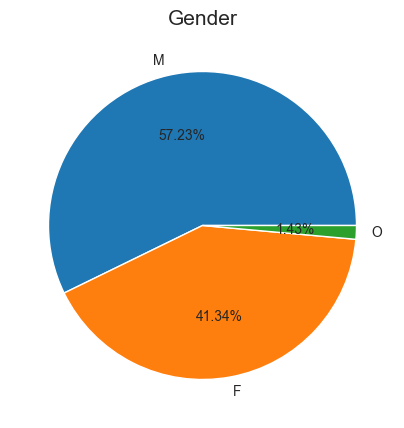

In [23]:
plt.figure(figsize = (5,5))

plt.pie(x=data_customer3['gender'].value_counts(), 
        labels=data_customer3['gender'].value_counts().index.tolist(), 
        autopct = '%1.2f%%')
plt.title('Gender', fontsize=15)

plt.show()

### 性别观察结论：
此次活动中，男性占比57.23%比女性41.34%多

### 年龄分析

In [24]:
data_customer3['age'].value_counts()

age
58     408
53     372
51     363
59     359
54     359
      ... 
100     12
96       8
98       5
101      5
99       5
Name: count, Length: 84, dtype: int64

In [25]:
data_customer3['age'].describe()

count    14825.000000
mean        54.393524
std         17.383705
min         18.000000
25%         42.000000
50%         55.000000
75%         66.000000
max        101.000000
Name: age, dtype: float64

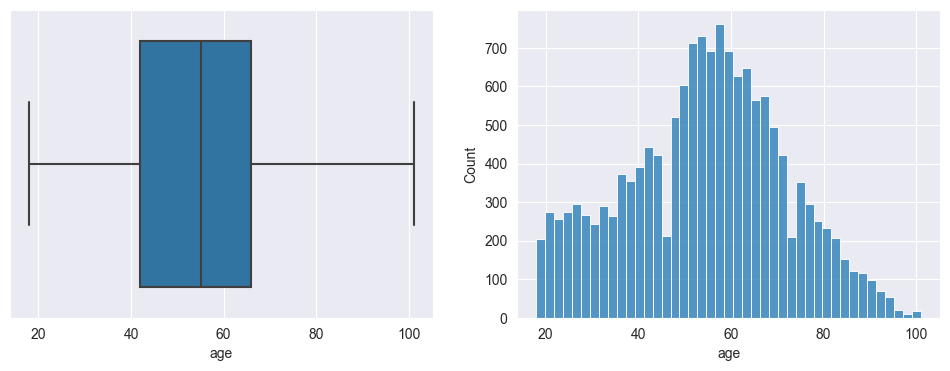

In [29]:
# 年龄可视化
fig, axs = plt.subplots(1,2, figsize=(12,4))

sns.boxplot(data=data_customer3, x='age', ax=axs[0])
sns.histplot(data=data_customer3, x='age', ax=axs[1])

plt.show()

年龄数据符合正态分布，但是观察到有异常值

In [31]:
print('Min age: '+ str(min(data_customer3['age'])))
print('Max age: '+ str(max(data_customer3['age'])))

Min age: 18
Max age: 101


将年龄进行分组，可视化

In [45]:
age_group = pd.cut(data_customer3['age'],
                  bins = [data_customer3['age'].min(), 26, 36, 46, 56, 66, 76, data_customer3['age'].max()],
                  labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '>76'])

data_customer3['age_group'] = age_group

# 计算各个年龄组的占比
age_group_per = (data_customer3['age_group'].value_counts().sort_index() / data_customer3.shape[0] * 100).round(2)
age_group_per

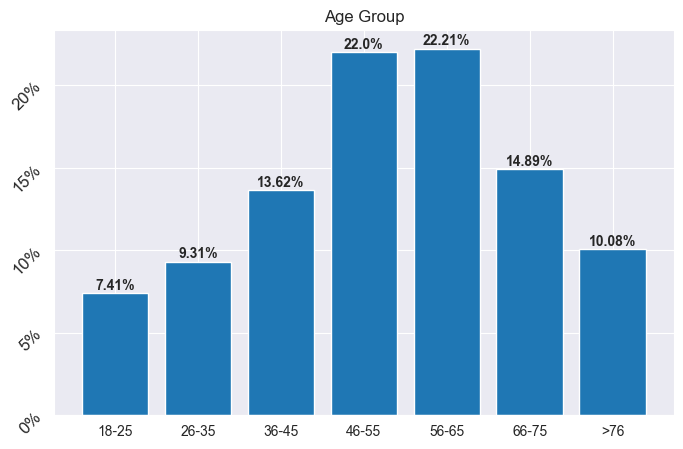

In [48]:
plt.figure(figsize=(8,5))

yticks = np.arange(0,25,5)
yticklabels = [str(y) + '%' for y in yticks]

plt.yticks(yticks, labels = yticklabels)
plt.yticks(rotation = 45, fontsize = 12)
plt.title('Age Group')

bar_plot = plt.bar(x = age_group_per.index.values, height = age_group_per)

for i, bar in enumerate(bar_plot.patches):
    x,y = bar.get_xy()
    plt.text(x+bar.get_width()/2, y+bar.get_height()+0.2,
            str(age_group_per[i]) + '%',
            ha = 'center',
            weight = 'bold')

### 年龄观察结论：
1. 第一梯队占比最多的年龄组为46-65岁，一共占据约50%，是这次优惠活动反应的主力
2. 第二梯队，年龄组为36-45和66-75，各占14%左右
3. 总体来说，年轻人的占比是最低的，说明他们对优惠活动的反应不大；中老年人对于优惠活动的参与度更高

### 收入分析

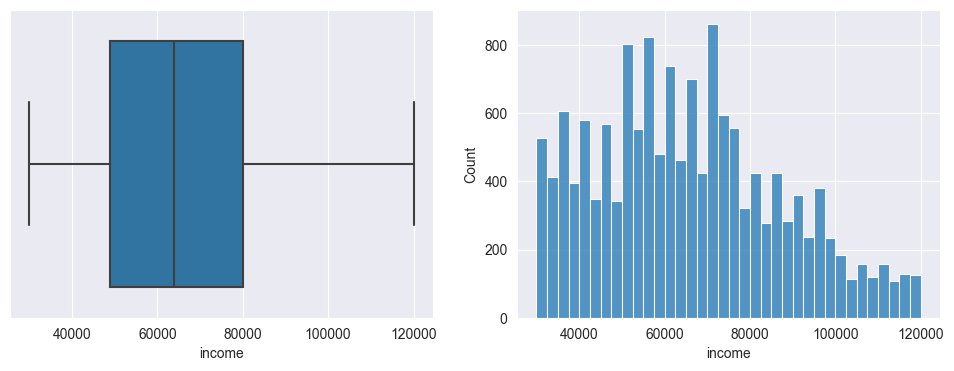

In [49]:
# 同样先观察收入的可视化基本情况
fig, axs = plt.subplots(1,2, figsize=(12,4))

sns.boxplot(data=data_customer3, x='income', ax=axs[0])
sns.histplot(data=data_customer3, x='income', ax=axs[1])

plt.show()

In [56]:
data_customer3['income'].describe()

count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: income, dtype: float64

In [83]:
print('收入众数为'+ str(data_customer3['income'].value_counts().tolist()[0])+ 
      '个人, \n收入为' +
      str(data_customer3['income'].mode().values[0]) + '元'
      
     )

收入众数为314个人, 
收入为73000.0元


In [70]:
data_customer3['income'].value_counts().tolist()[0]

314

#### 进行分组可视化

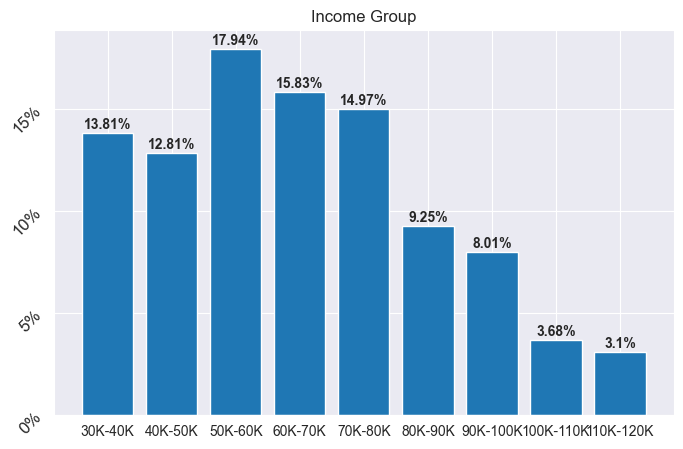

In [55]:
income_group = pd.cut(data_customer3['income'],
                  bins = [data_customer3['income'].min(), 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, data_customer3['income'].max()],
                  labels = ['30K-40K', '40K-50K', '50K-60K', '60K-70K', '70K-80K', '80K-90K', '90K-100K', '100K-110K', '110K-120K'])

data_customer3['income_group'] = income_group

# 计算各个年龄组的占比
income_group_per = (data_customer3['income_group'].value_counts().sort_index() / data_customer3.shape[0] * 100).round(2)


# 可视化
plt.figure(figsize=(8,5))

yticks = np.arange(0,25,5)
yticklabels = [str(y) + '%' for y in yticks]

plt.yticks(yticks, labels = yticklabels)
plt.yticks(rotation = 45, fontsize = 12)
plt.title('Income Group')

bar_plot = plt.bar(x = income_group_per.index.values, height = income_group_per)

for i, bar in enumerate(bar_plot.patches):
    x,y = bar.get_xy()
    plt.text(x+bar.get_width()/2, y+bar.get_height()+0.2,
            str(income_group_per[i]) + '%',
            ha = 'center',
            weight = 'bold')

### 收入观察结果：
1. 客户收入范围在30K-120K，平均为65K
2. 收入极高的人对优惠活动的响应较低
3. 合理推测，收入极低或极高的人，都不是优惠活动的目标客群

### 成为会员时间的影响分析

In [84]:
data_customer3

,gender,age,id,income,became_member_date,age_group,income_group
1,F,55,0610b486422d4921ae7d2bf64640c50b,112000.0,2017-07-15,46-55,110K-120K
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017-05-09,66-75,90K-100K
5,M,68,e2127556f4f64592b11af22de27a7932,70000.0,2018-04-26,66-75,60K-70K
8,M,65,389bc3fa690240e798340f5a15918d5c,53000.0,2018-02-09,56-65,50K-60K
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2017-11-11,56-65,50K-60K
...,...,...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,54000.0,2018-06-04,36-45,50K-60K
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,72000.0,2018-07-13,56-65,70K-80K
16997,M,49,01d26f638c274aa0b965d24cefe3183f,73000.0,2017-01-26,46-55,70K-80K
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,50000.0,2016-03-07,>76,40K-50K


#### 将时间拆分成年、月、日、工作日等不同维度，便于后续分析

In [88]:
data_customer3 = data_customer3.assign(member_year = data_customer3.became_member_date.dt.year,
                                      member_month = data_customer3.became_member_date.dt.month,
                                      member_day = data_customer3.became_member_date.dt.day,
                                      member_day_of_week = data_customer3.became_member_date.dt.weekday,
                                      member_day_name = data_customer3.became_member_date.dt.day_name())

data_customer3

,gender,age,id,income,became_member_date,age_group,income_group,member_year,member_month,member_day,member_day_of_week,member_day_name
1,F,55,0610b486422d4921ae7d2bf64640c50b,112000.0,2017-07-15,46-55,110K-120K,2017,7,15,5,Saturday
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017-05-09,66-75,90K-100K,2017,5,9,1,Tuesday
5,M,68,e2127556f4f64592b11af22de27a7932,70000.0,2018-04-26,66-75,60K-70K,2018,4,26,3,Thursday
8,M,65,389bc3fa690240e798340f5a15918d5c,53000.0,2018-02-09,56-65,50K-60K,2018,2,9,4,Friday
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2017-11-11,56-65,50K-60K,2017,11,11,5,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,54000.0,2018-06-04,36-45,50K-60K,2018,6,4,0,Monday
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,72000.0,2018-07-13,56-65,70K-80K,2018,7,13,4,Friday
16997,M,49,01d26f638c274aa0b965d24cefe3183f,73000.0,2017-01-26,46-55,70K-80K,2017,1,26,3,Thursday
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,50000.0,2016-03-07,>76,40K-50K,2016,3,7,0,Monday


#### 对"年"进行可视化分析

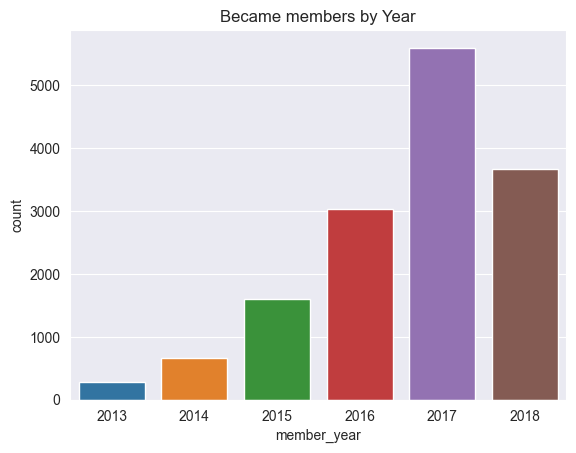

In [107]:
sns.countplot(data = data_customer3, x = 'member_year')
plt.title('Became members by Year')

counts = data_customer3.groupby('member_year')['id'].nunique()  

plt.show()

1. 从2013-2017逐年增长，但2018骤降，具体原因需要进一步分析
2. 2017增长迅猛

#### 对月进行可视化分析

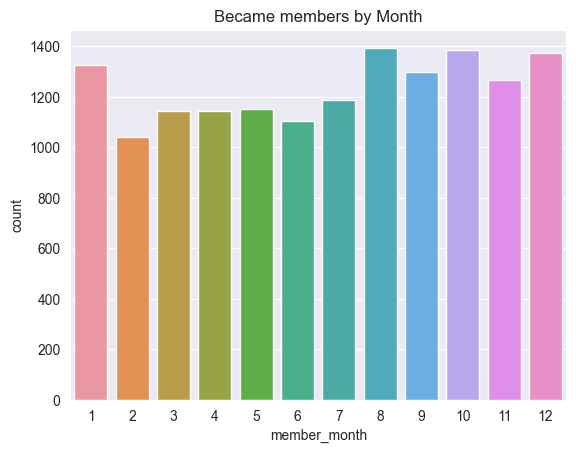

In [114]:
sns.countplot(data = data_customer3, x = 'member_month')

plt.title('Became members by Month')

plt.show()

#### 月份整体数据显示：
1. 2月份的新会员最少
2. 一年可以分为两个周期，2-7月份新会员数量增长较少，8-1月份数量增长较多，猜测和季节有关

#### 对周进行可视化分析

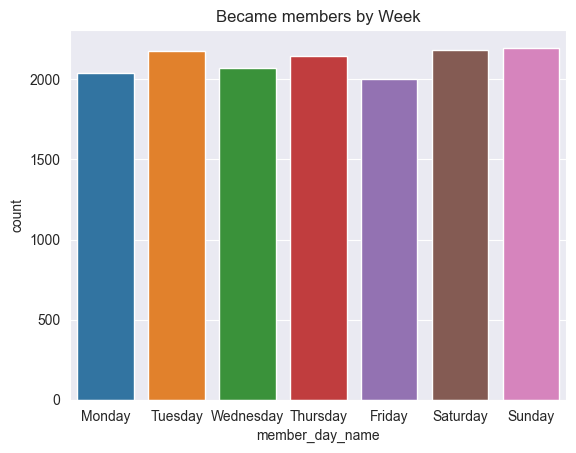

In [116]:
sns.countplot(data = data_customer3.sort_values('member_day_of_week'), x = 'member_day_name')

plt.title('Became members by Week')

plt.show()

#### 星期整体数据显示：
1. 周末新增会员比工作日更多
2. 工作日中的会员增长呈现有趣现象，周一、周五增长最少，周二、周四增长最多，周三居中

### 成为会员时间的观察结果：
1. 2018新会员教前一年骤降，需要进一步分析，如使用PEST行业分析、多维度拆解分析等方法进行深入分析
2. 2-7月份新会员数量增长较少，8-1月份数量增长较多，可能与季节相关，得根据活动当地的实际情况进行分析
3. 工作日和周中的会员注册人数更高，猜测和目标客群多为需要工作的人居多有关。可考虑在周末增加活动力度，吸引新会员

## 对客户进行特征探索 -- 双变量解析 (Bivariate analysis)

### 年龄 - 性别

In [130]:
data_customer3.groupby('gender').agg({'age':'mean'})

,age
gender,
F,57.544950
M,52.116690
O,54.400943


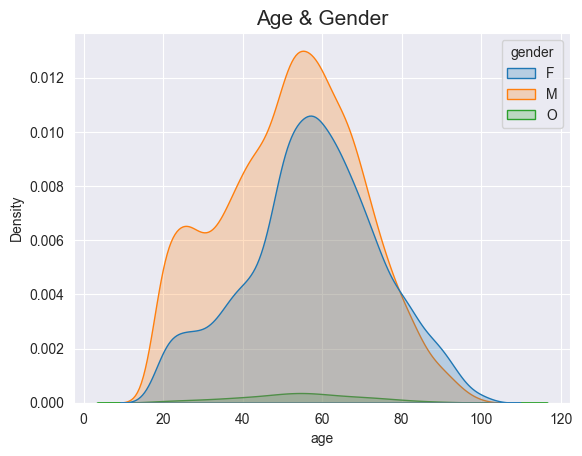

In [131]:
sns.kdeplot(data = data_customer3, x = 'age', hue = 'gender', fill = True)
plt.title('Age & Gender', fontsize = 15)

plt.show()

### 收入 - 性别

In [132]:
data_customer3.groupby('gender').agg({'income':'mean'})

,income
gender,
F,71306.412139
M,61194.601603
O,63287.735849


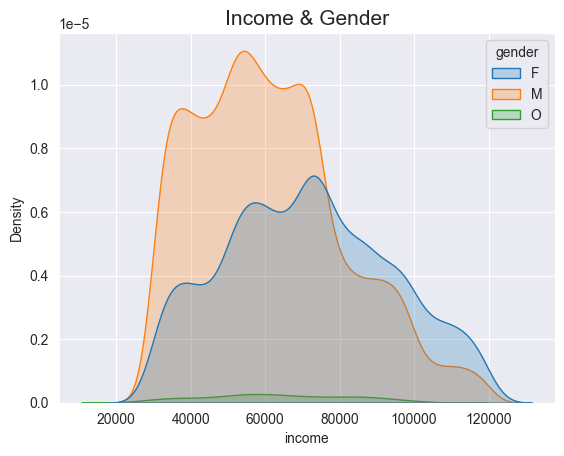

In [133]:
sns.kdeplot(data = data_customer3, x = 'income', hue = 'gender', fill = True)
plt.title('Income & Gender', fontsize = 15)

plt.show()

### 性别影响因素：
1. 女性顾客的收入和年龄都较为符合正态分布
2. 男性顾客的年龄和收入呈向右倾斜状态，说明更受年轻且收入较低男性顾客的喜爱
3. 由此猜测，年龄和收入可能存在正相关关系

### 年龄 - 收入

In [135]:
data_customer3.groupby('age_group').agg({'income':'mean'})

,income
age_group,
18-25,50924.476797
26-35,51168.840580
36-45,59424.467558
46-55,69203.862661
56-65,70026.116004
66-75,70690.530131
>76,71707.692308


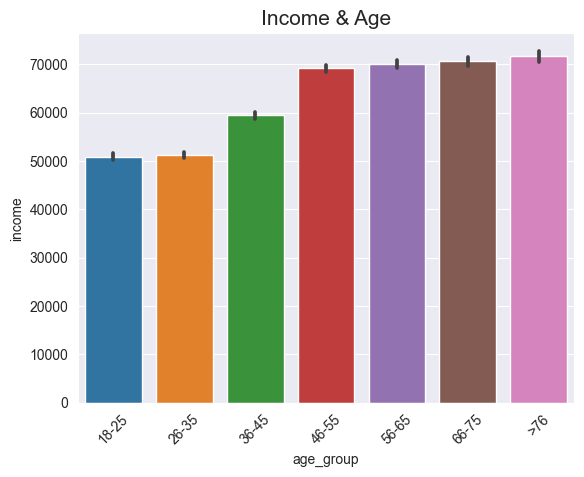

In [138]:
sns.barplot(data = data_customer3, x = 'age_group', y = 'income')

plt.xticks(rotation = 45)

plt.title('Income & Age', fontsize = 15)

plt.show()

<Axes: >

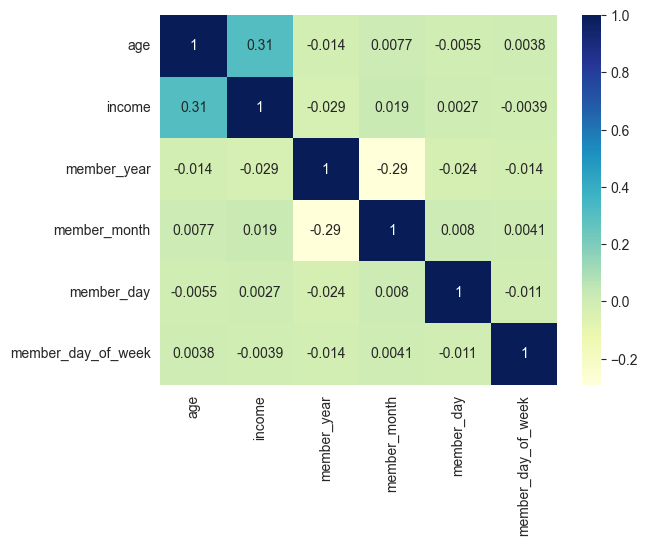

In [142]:
customer_related = data_customer3.select_dtypes(np.number)

sns.heatmap(customer_related.corr(), annot=True, cmap='YlGnBu')

初步探究，年龄与收入呈正相关

## 综上所述：客户
1. 此次活动中，男性占比57.23%比女性41.34%多
2. 年龄数据符合正态分布，但是观察到有异常值，猜测可能出现会员登记随意填写的情况
3. 46-65岁，占据活动客群约50%，是这次优惠活动反应的主力
4. 年轻人的占比是最低的，说明他们对优惠活动的反应不大；中老年人对于优惠活动的参与度更高
5. 2013-2017年，新用户稳步迅速增长，2017年达到高峰。但是2018年出现了未知因素，导致新用户增长率骤降；需要进一步分析，如使用PEST行业分析、多维度拆解分析等方法进行深入分析
6. 一年可以分为两个周期，2-7月份新会员数量增长较少，8-1月份数量增长较多，猜测和季节有关，得根据活动当地的实际情况进行分析；
7. 工作日和周中的会员注册人数更高，猜测和目标客群多为需要工作的人居多有关。可考虑在周末增加活动力度，吸引新会员
8. 年龄和收入呈正相关，在活动中，女性群体呈正态分布；但男性顾客的年龄和收入呈向右倾斜状态，说明更受年轻且收入较低男性顾客的喜爱

## 对商家活动进行特征探索

In [143]:
data_offer3

,reward,channels,difficulty,duration,offer_type,id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [144]:
data_offer3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes


共10个不同的活动，包含3个数值型特征和3个非数值型特征

In [149]:
data_offer3['offer_type'].value_counts()

offer_type
bogo             4
discount         4
informational    2
Name: count, dtype: int64

### 活动类型

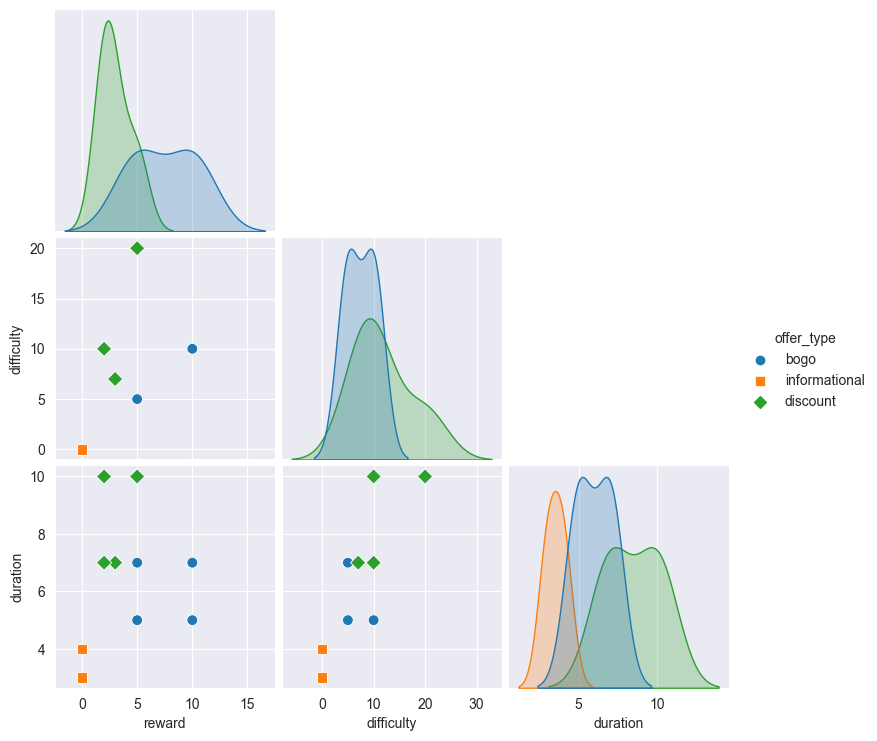

In [157]:
# 绘制散点图矩阵 分层核密度估计 (KDE)
sns.pairplot(data_offer3, hue='offer_type',
             markers=["o", "s", "D"],
            plot_kws = dict(marker='o', s=60),
            corner=True)
plt.show()

1. 4个'bogo'买一送一优惠，4个'折扣'优惠，2个'信息'优惠
2. 折扣优惠持续时间最长，同时难度也是最高的，但是奖励较低

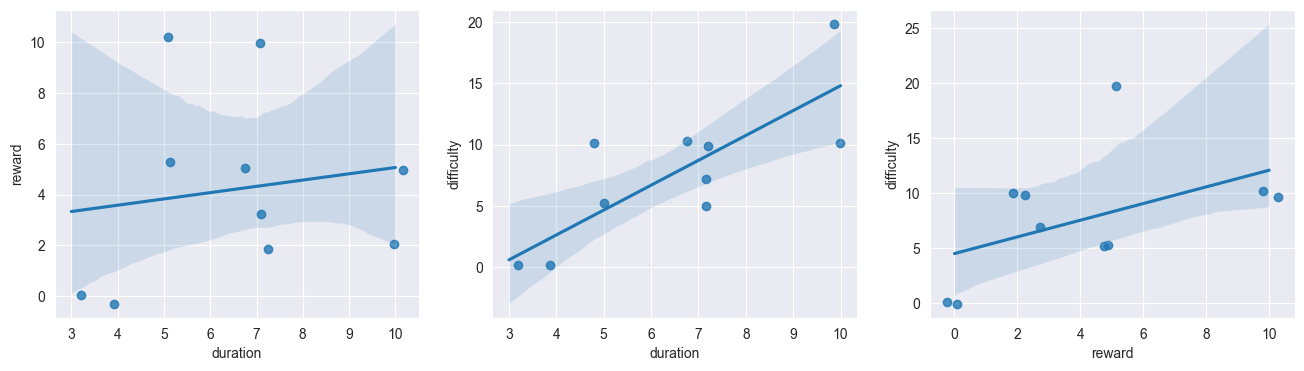

In [162]:
# 进一步分析相关性
fig, axs = plt.subplots(1,3, figsize = (16,4))

sns.regplot(data = data_offer3, x = 'duration', y ='reward', x_jitter = 0.3, y_jitter = 0.3, ax = axs[0])
sns.regplot(data = data_offer3, x = 'duration', y ='difficulty', x_jitter = 0.3, y_jitter = 0.3, ax = axs[1])
sns.regplot(data = data_offer3, x = 'reward', y ='difficulty', x_jitter = 0.3, y_jitter = 0.3, ax = axs[2])

plt.show()

持续时间和困难呈正相关

### 活动推送途径

In [158]:
data_offer3['channels'].value_counts()

channels
['web', 'email', 'mobile', 'social']    4
['web', 'email', 'mobile']              3
['email', 'mobile', 'social']           2
['web', 'email']                        1
Name: count, dtype: int64

总共四张不同推送途径，'web', 'email', 'mobile', 'social'，重新组成四种不同组合

## 综上所述，活动：
1. 共10个不同的活动类型
2. 4个'bogo'买一送一优惠，4个'折扣'优惠，2个'信息'优惠
3. 总共四张不同推送途径，'web', 'email', 'mobile', 'social'，重新组成四种不同组合
4. 活动中持续时间和困难呈正相关

## 对活动情况进行特征探索

In [216]:
data_transcript3

,person,event,time,dict_key,dict_value,day_since_start
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7,0
2,e2127556f4f64592b11af22de27a7932,offer received,0,offer id,2906b810c7d4411798c6938adc9daaa5,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,offer id,fafdcd668e3743c1bb461111dcafc2a4,0
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0,0
...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,amount,1.59,29
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,amount,9.53,29
306531,a00058cf10334a308c68e7631c529907,transaction,714,amount,3.61,29
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,amount,3.53,29


In [164]:
data_transcript3['event'].value_counts()

event
transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: count, dtype: int64

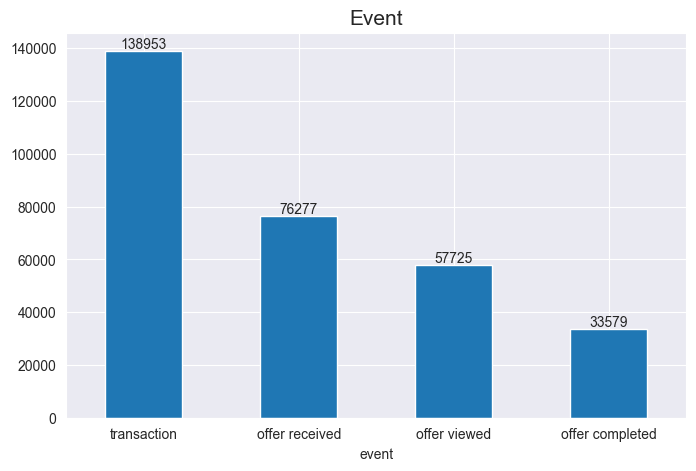

In [194]:
plt.figure(figsize = (8,5))

data_transcript3['event'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Event', fontsize=15)

# 添加数值显示
counts = data_transcript3['event'].value_counts()  
ax = plt.gca()
heights = [rect.get_height() for rect in ax.patches]  

for rect, h, c in zip(ax.patches, heights, counts): 
    ax.text(rect.get_x() + rect.get_width() / 2, h + 0.5, c,
            ha='center', va='bottom', fontsize=10)

plt.show()

1. 活动期间，共计140K个交易数量，是优惠交易数量的四倍，说明很多客户即使没有优惠也在进行交易，体现良好的客户粘性
2. 总共发放76K份优惠，58K浏览量，76%顾客点击进行了浏览，证明营销活动的设计很成功，吸引了绝大部分客户的参与
3. 33K客户完成了优惠点单，是浏览量的58%，再次证明活动很成功

### 观察到数据集中有一列专门统计了活动的持续时间，最长714h，约30天一个月的时间

In [195]:
# 新建特征列，代表活动进行的第几天
data_transcript3 = data_transcript3.assign(day_since_start = data_transcript3['time'] / 24).astype({'day_since_start':'int64'})
data_transcript3

,person,event,time,dict_key,dict_value,day_since_start
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7,0
2,e2127556f4f64592b11af22de27a7932,offer received,0,offer id,2906b810c7d4411798c6938adc9daaa5,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,offer id,fafdcd668e3743c1bb461111dcafc2a4,0
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0,0
...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,amount,1.59,29
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,amount,9.53,29
306531,a00058cf10334a308c68e7631c529907,transaction,714,amount,3.61,29
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,amount,3.53,29


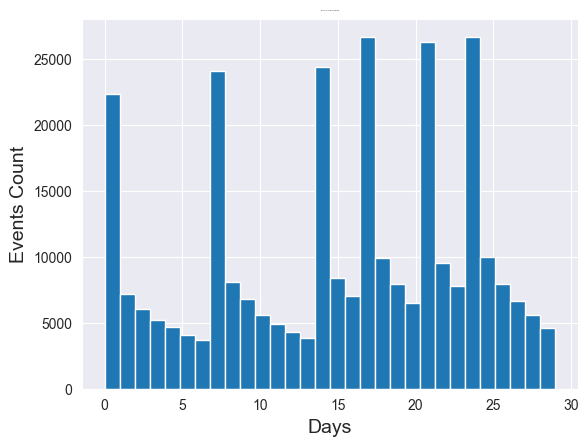

In [199]:
# 可视化活动随着时间变化的特征变化
plt.hist(data_transcript3['day_since_start'], bins = 30)

plt.xlabel('Days', fontsize = 14)
plt.ylabel('Events Count', fontsize = 14)
plt.title('Events Occurrence over time', fontsize = 1)

plt.show()

整个活动持续时间内，有明显6个事件高峰，对应六个特征类似的数值变化；  
猜测活动期间共有六次活动推送，顾客随后发生了查看、消费、购买等活动

In [202]:
# 寻找活动推送的时间节点
data_transcript3[data_transcript3['event'] == 'offer received'].groupby('time').count()

,person,event,dict_key,dict_value,day_since_start
time,,,,,
0,12650,12650,12650,12650,12650
168,12669,12669,12669,12669,12669
336,12711,12711,12711,12711,12711
408,12778,12778,12778,12778,12778
504,12704,12704,12704,12704,12704
576,12765,12765,12765,12765,12765


In [204]:
data_transcript3[data_transcript3['event'] == 'offer received'].groupby('day_since_start').count()

,person,event,time,dict_key,dict_value
day_since_start,,,,,
0,12650,12650,12650,12650,12650
7,12669,12669,12669,12669,12669
14,12711,12711,12711,12711,12711
17,12778,12778,12778,12778,12778
21,12704,12704,12704,12704,12704
24,12765,12765,12765,12765,12765


数据证明活动推送是集中推送的，才开始间隔约一周，活动后期每三天推送一次

### 继续探索在活动推送之后，客户的活动路径

In [205]:
# 计算客户三种活动的时间 -- 单位：小时
viewed_hourly = data_transcript3[data_transcript3['event'] == 'offer viewed'].value_counts('time').sort_index()
completed_hourly = data_transcript3[data_transcript3['event'] == 'offer completed'].value_counts('time').sort_index()
transaction_hourly = data_transcript3[data_transcript3['event'] == 'transaction'].value_counts('time').sort_index()
print(len(viewed_hourly), len(completed_hourly), len(transaction_hourly))

120 120 120


In [206]:
# 计算客户三种活动的时间 -- 单位：天
viewed_daily = data_transcript3[data_transcript3['event'] == 'offer viewed'].value_counts('day_since_start').sort_index()
completed_daily = data_transcript3[data_transcript3['event'] == 'offer completed'].value_counts('day_since_start').sort_index()
transaction_daily = data_transcript3[data_transcript3['event'] == 'transaction'].value_counts('day_since_start').sort_index()
print(len(viewed_daily), len(completed_daily), len(transaction_daily))

30 30 30


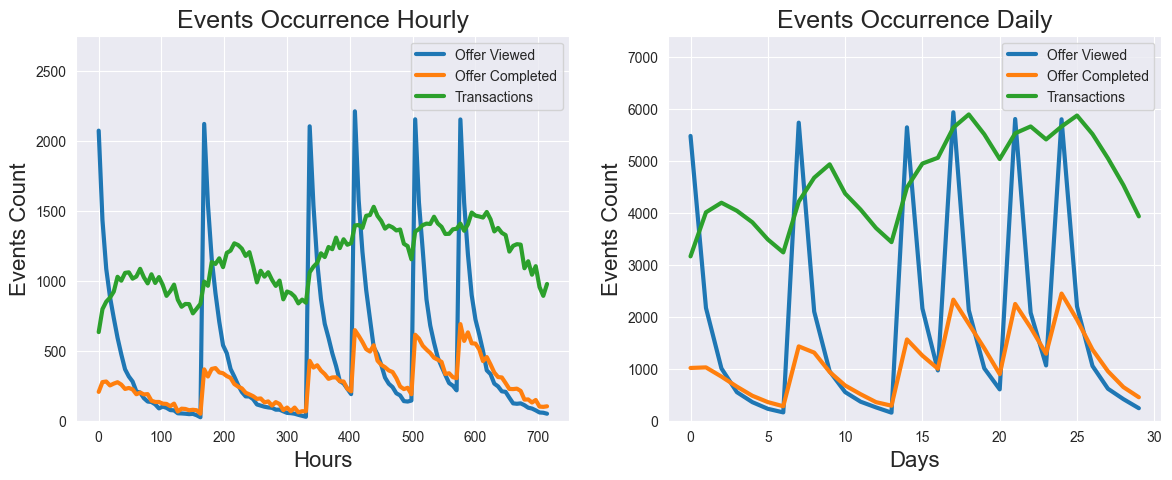

In [208]:
# 客户行为特征随着活动发生时间变化，可视化
hours = viewed_hourly.index.values

fig, axs = plt.subplots(1,2, figsize = (14, 5))

axs[0].plot(hours, viewed_hourly, lw = 3)
axs[0].plot(hours, completed_hourly, lw = 3)
axs[0].plot(hours, transaction_hourly, lw = 3)

axs[0].legend(['Offer Viewed', 'Offer Completed', 'Transactions'], loc = 'upper right', ncol = 1, fontsize = 10)

axs[0].set_ylim([0, 2750])

axs[0].set_xlabel('Hours', fontsize = 16)
axs[0].set_ylabel('Events Count', fontsize = 16)
axs[0].set_title('Events Occurrence Hourly', fontsize = 18)



days = np.arange(30)

axs[1].plot(days, viewed_daily, lw = 3)
axs[1].plot(days, completed_daily, lw = 3)
axs[1].plot(days, transaction_daily, lw = 3)

axs[1].legend(['Offer Viewed', 'Offer Completed', 'Transactions'], loc = 'upper right', ncol = 1, fontsize = 10)

axs[1].set_ylim([0, 7400])

axs[1].set_xlabel('Days', fontsize = 16)
axs[1].set_ylabel('Events Count', fontsize = 16)
axs[1].set_title('Events Occurrence Daily', fontsize = 18)

plt.show()

<Axes: >

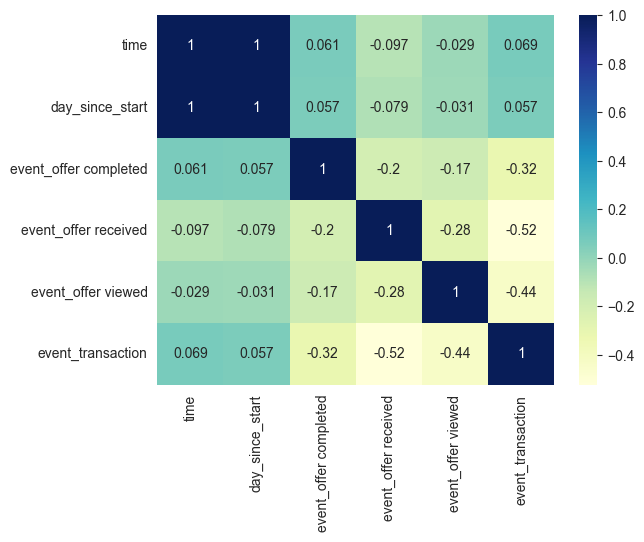

In [220]:
# 活动之间的相关性分析
transcript3_related_test = data_transcript3.drop(['person','dict_value','dict_key'], axis=1)

transcript3_related_test = pd.get_dummies(transcript3_related_test)

sns.heatmap(transcript3_related_test.corr(), annot=True, cmap='YlGnBu')

## 综上所述，活动情况：
1. 整个活动持续时间一个月
2. 共计主动推送了六次，前三次间隔约一周，后三次每三天推送，且推送时间都在一小时内完成
3. 每次推送之后，客户都会被唤醒，达到接收查看活动信息高峰，紧接着几小时内，达到活动使用消费高峰，证明大部分客户在接收优惠活动后当天便会使用
4. 活动期间的客户参与数量和交易数量均良好，证明此次活动设计很成功
5. 优惠活动不仅能带来短期消费的增加，而且提高了客户粘性，助于客户形成消费习惯；所以公司可以尝试以一定的频率对客户发送优惠

## 进一步思考，总计三类10种活动，哪一种更优，下次可以怎么改良
1. 查看率
2. 完成率

In [274]:
# 提取特征列
data_event = data_transcript3[data_transcript3['event'] != 'transaction']

data_offer4 = data_offer3.copy()
data_offer4['offer_id_uni'] = ['A','B','C','D','E','F','G','H','I','J']

# 合并表格
event_offer = pd.merge(data_event, data_offer4, left_on = 'dict_value', right_on = 'id').drop(['id', 'dict_value'], axis=1)
event_offer.head()

,person,event,time,dict_key,day_since_start,reward,channels,difficulty,duration,offer_type,offer_id_uni
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,offer id,0,5,"['web', 'email', 'mobile']",5,7,bogo,D
1,ebe7ef46ea6f4963a7dd49f501b26779,offer received,0,offer id,0,5,"['web', 'email', 'mobile']",5,7,bogo,D
2,f082d80f0aac47a99173ba8ef8fc1909,offer received,0,offer id,0,5,"['web', 'email', 'mobile']",5,7,bogo,D
3,c0d210398dee4a0895b24444a5fcd1d2,offer received,0,offer id,0,5,"['web', 'email', 'mobile']",5,7,bogo,D
4,57dd18ec5ddc46828afb81ec5977bef2,offer received,0,offer id,0,5,"['web', 'email', 'mobile']",5,7,bogo,D


### 总体完成率

In [275]:
event_offer['event'].value_counts()

event
offer received     76277
offer viewed       57725
offer completed    33579
Name: count, dtype: int64

In [276]:
# offer received
offer_received = event_offer[event_offer['event'] == 'offer received']
received_id_num = offer_received.value_counts('offer_id_uni')

# offer completed
offer_completed = event_offer[event_offer['event'] == 'offer completed']
completed_id_num = offer_completed.value_counts('offer_id_uni')

In [277]:
overall_completed_rate = (completed_id_num.sort_index() / received_id_num.sort_index()).sort_values(ascending = False)

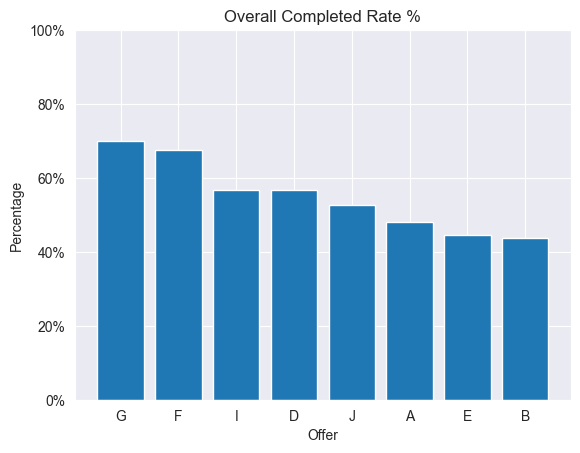

In [323]:
plt.bar(x = overall_completed_rate.index.values, height = overall_completed_rate.values)

plt.title('Overall Completed Rate %')
plt.xlabel('Offer')
plt.ylabel('Percentage')

plt.yticks(np.arange(0,1.2, 0.2), labels = ['0%', '20%', '40%', '60%', '80%', '100%'])

plt.show()

### 总体完成率最高的是G和F，都达到了将近70%的完成率；E和B不太理想，只有40%左右

### 总体查看率

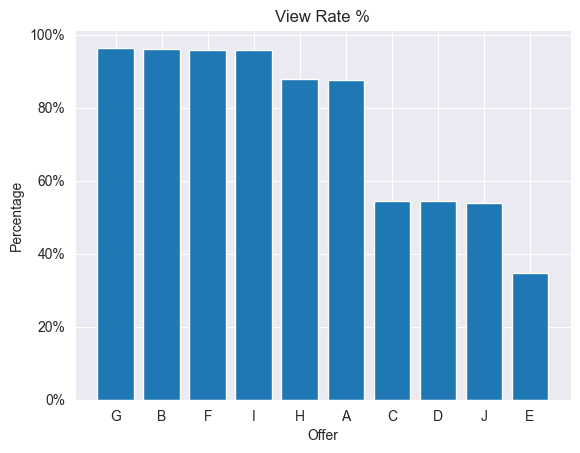

In [303]:
offer_viewed = event_offer[event_offer['event'] == 'offer viewed']
viewed_id_num = offer_viewed.value_counts('offer_id_uni')

viewed_id_num_rate = (viewed_id_num.sort_index() / received_id_num.sort_index()).sort_values(ascending = False)

plt.bar(x = np.arange(len(viewed_id_num)), height = viewed_id_num_rate.values, tick_label = viewed_id_num_rate.index.values)

plt.title('View Rate %')
plt.xlabel('Offer')
plt.ylabel('Percentage')

plt.yticks(np.arange(0,1.2, 0.2), labels = ['0%', '20%', '40%', '60%', '80%', '100%'])

plt.show()

In [301]:
event_offer['channels'].value_counts()

channels
['web', 'email', 'mobile', 'social']    77733
['web', 'email', 'mobile']              43730
['email', 'mobile', 'social']           32367
['web', 'email']                        13751
Name: count, dtype: int64

In [331]:
event_offer[event_offer['event'] == 'offer viewed'].groupby(['channels']).count().T[:1]

channels,"['email', 'mobile', 'social']","['web', 'email', 'mobile', 'social']","['web', 'email', 'mobile']","['web', 'email']"
person,13403,29226,12433,2663


In [332]:
event_offer[event_offer['event'] == 'offer completed'].groupby(['offer_type']).count().T[:1]

offer_type,bogo,discount
person,15669,17910


In [ ]:
event_offer[event_offer['event'] == 'offer completed'].groupby(['offer_type']).count().T[:1]

### 总结
1. 反响最好的活动是G和F，都达到了将近70%的完成率
2. 推送渠道对活动产生了积极影响，且重要性排序：social > email > mobile > web；发放途径越多，总体查看率越高；如果预算紧张，可以根据重要性排序进行选择发放优惠活动信息
3. 影响完成率的最重要因素是优惠类型。客户更喜欢 "折扣 "优惠而不是 "bogo "优惠(买一送一)

## 查看率和完成率的相关性分析

In [358]:
df1 = pd.DataFrame(overall_completed_rate)
df2 = pd.DataFrame(viewed_id_num_rate)

data_offer5 = pd.merge(df1, df2, 
                       left_on = 'offer_id_uni', 
                       right_on = 'offer_id_uni',
                      suffixes=('overall_completed_rate','viewed_id_num_rate'))
data_offer5 = pd.merge(data_offer4, data_offer5,
                      left_on = 'offer_id_uni', 
                      right_on = 'offer_id_uni',).drop('id', axis=1)

data_offer5

,reward,channels,difficulty,duration,offer_type,offer_id_uni,countoverall_completed_rate,countviewed_id_num_rate
0,10,"['email', 'mobile', 'social']",10,7,bogo,A,0.481588,0.876991
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,B,0.438694,0.961148
2,0,"['web', 'email', 'mobile']",0,4,informational,C,NaN,0.544046
3,5,"['web', 'email', 'mobile']",5,7,bogo,D,0.567149,0.543311
4,5,"['web', 'email']",20,10,discount,E,0.446009,0.347287
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,F,0.674340,0.959587
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,G,0.699882,0.964460
7,0,"['email', 'mobile', 'social']",0,3,informational,H,NaN,0.877789
8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,I,0.567428,0.959451
9,2,"['web', 'email', 'mobile']",10,7,discount,J,0.526336,0.539570


<Axes: >

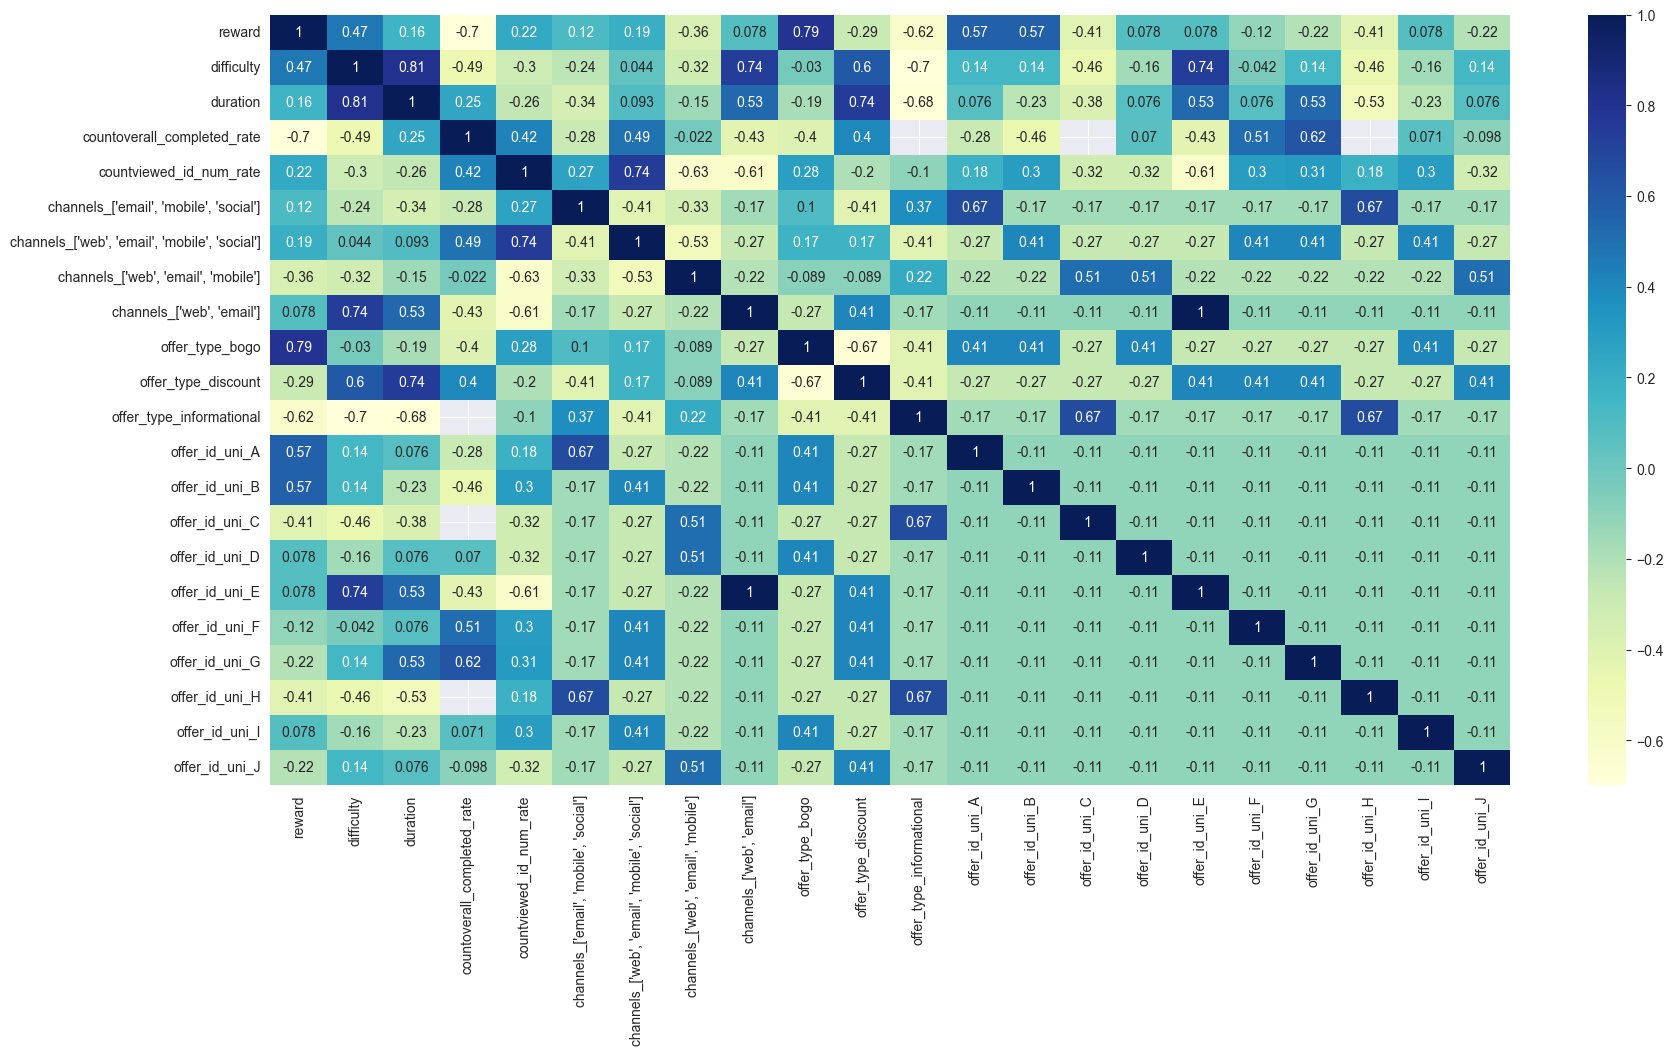

In [366]:
data_offer5_related = pd.get_dummies(data_offer5)

plt.figure(figsize=(20,10))
sns.heatmap(data_offer5_related.corr(), annot=True, cmap='YlGnBu')

## 查看率和完成率的相关性分析：
1. reward和overall_completed_rate居然呈现出强烈的负相关系数。但事实上，完成率主要受活动类型的影响，而 "bogo "活动恰好比 "折扣 "活动有更高的奖励，所以导致了这个看似反直觉的结果
2. 持续时间似乎与优惠完成率呈正相关
3. 具体影响结果还需要进一步分析

# 商家活动探索结果：
1. 反响最好的活动是G和F，都达到了将近70%的完成率
2. 推送渠道对活动产生了积极影响，且重要性排序：social > email > mobile > web；发放途径越多，总体查看率越高；如果预算紧张，可以根据重要性排序进行选择发放优惠活动信息
3. 影响完成率的最重要因素是优惠类型。客户更喜欢 "折扣 "优惠而不是 "bogo "优惠(买一送一)